In [1]:
import sys
!{sys.executable} -m pip install openai==1.1.1


  Obtaining dependency information for openai==1.1.1 from https://files.pythonhosted.org/packages/f7/86/ea99e3f966a639a3256e2f79d78cd63d45d5eb651a5457ccbdcfd9eed24a/openai-1.1.1-py3-none-any.whl.metadata
  Using cached distro-1.8.0-py3-none-any.whl (20 kB)
  Obtaining dependency information for httpx<1,>=0.23.0 from https://files.pythonhosted.org/packages/82/61/a5fca4a1e88e40969bbd0cf0d981f3aa76d5057db160b94f49603fc18740/httpx-0.25.1-py3-none-any.whl.metadata
  Obtaining dependency information for httpcore from https://files.pythonhosted.org/packages/56/ba/78b0a99c4da0ff8b0f59defa2f13ca4668189b134bd9840b6202a93d9a0f/httpcore-1.0.2-py3-none-any.whl.metadata
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.8/217.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 2.2 MB/s eta 0:00:00


In [8]:
from IPython.display import display, Image, Audio

import cv2  # We're using OpenCV to read video
import base64
import time
import openai
import os
import requests

In [9]:
import sys
!{sys.executable} -m pip show openai

Name: openai
Version: 1.1.1
Summary: Client library for the openai API
Home-page: 
Author: 
Author-email: OpenAI <support@openai.com>
License: 
Location: /Users/mpaz/anaconda3/lib/python3.11/site-packages
Requires: anyio, distro, httpx, pydantic, tqdm, typing-extensions
Required-by: 


1. Using GPT's visual capabilities to get a description of a video

First, we use OpenCV to extract frames from a nature video containing bisons and wolves:

In [3]:
video = cv2.VideoCapture("../data/bison.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

[ WARN:0@175.936] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_f6tvh9615u/croot/opencv-suite_1691620375715/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ERROR:0@175.936] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_f6tvh9615u/croot/opencv-suite_1691620375715/work/modules/videoio/src/cap.cpp (166) open VIDEOIO(GSTREAMER): raised OpenCV exception:

OpenCV(4.6.0) /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_f6tvh9615u/croot/opencv-suite_1691620375715/work/modules/core/src/utils/filesystem.cpp:580: error: (-213:The function/feature is not implemented)  in function 'exists'




618 frames read.


Display frames to make sure we've read them in correctly:

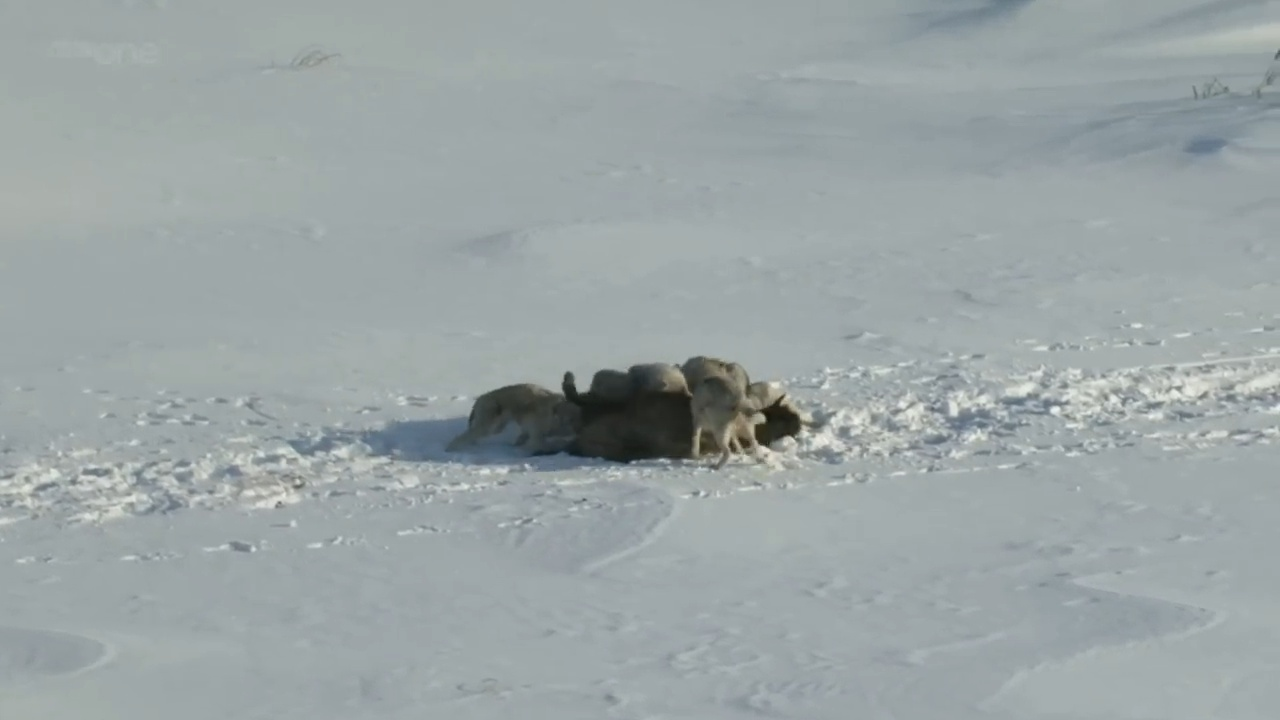

In [4]:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

Once we have the video frames, we craft our prompt and send a request to GPT (Note that we don't need to send every frame for GPT to understand what's going on):

In [6]:
import os
import dotenv

# Get the path to the .env file
dotenv_path = dotenv.find_dotenv()

# Load the .env file
dotenv.load_dotenv(dotenv_path)

api_key = os.getenv('OPENAI_API_KEY')

In [7]:
import openai

PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames from a video that I want to upload. Generate a compelling description that I can upload along with the video.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::10]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "api_key": api_key,
    "headers": {"Openai-Version": "2020-11-07"},
    "max_tokens": 200,
}

result = openai.ChatCompletion.create(**params)
print(result.choices[0].message.content)

AttributeError: module 'openai' has no attribute 'ChatCompletion'